In [7]:
import torch
from torch.utils.data import DataLoader
from train import Trainer
from generator import *
from discriminator import GAN
from dataset import CocoStuffDataSet
import os, argparse, datetime, json

from utils import *
NUM_CLASSES = 81
SAVE_DIR = "../checkpoints" # Assuming this is launched from code/ subfolder.
experiment_name = 'checkpoints_save/full_data'
experiment_dir = os.path.join(SAVE_DIR, experiment_name)
batch_size = 1

In [8]:
HEIGHT, WIDTH = 128, 128
val_loader = DataLoader(CocoStuffDataSet(mode='val', height=HEIGHT, width=WIDTH),
                            batch_size, shuffle=False)
train_loader = DataLoader(CocoStuffDataSet(mode='train', height=HEIGHT, width=WIDTH),
                            batch_size, shuffle=True)

loading annotations into memory...
Done (t=0.39s)
creating index...
index created!
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]
Loaded 5000 samples: 
loading annotations into memory...
Done (t=15.60s)
creating index...
index created!
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]
Loaded 118287 samples: 


In [9]:
generator = SegNet16(NUM_CLASSES)

image_shape = (3, HEIGHT, WIDTH)
segmentation_shape = (NUM_CLASSES, HEIGHT, WIDTH)
# discriminator = GAN(NUM_CLASSES, segmentation_shape, image_shape)
discriminator = None
trainer = Trainer(generator, discriminator, train_loader, val_loader, \
                experiment_dir=experiment_dir, resume=True)


44
Using device cuda:0
Runing network without GAN loss.
=> loading checkpoint '../checkpoints/checkpoints_save/full_data/ckpt.pth.tar'
=> loaded checkpoint '../checkpoints/checkpoints_save/full_data/ckpt.pth.tar' (iter 1109)


In [11]:

# just do evaluation
# trainer.evaluate_meanIOU(train_loader, debug=True)

# print("Ignoring background")
# train_acc = trainer.evaluate_pixel_accuracy(train_loader, ignore_background=True)
# val_acc = trainer.evaluate_pixel_accuracy(val_loader, ignore_background=True)
# print("Train pixel accuracy: {}".format(train_acc))
# print("Val pixel accuracy: {}".format(val_acc))

def visualize_mask(loader, number):
    total = 0
    for data, mask_gt, gt_visual in loader:
        if total < number:      
            data = data.to(trainer.device)
            batch_size = data.size()[0]
            total += batch_size
            mask_pred = convert_to_mask(trainer._gen(data))
            for i in range(len(data)):
                img = data[i].detach().cpu().numpy()
                gt_mask = gt_visual[i].detach().cpu().numpy()
                pred_mask = np.argmax(mask_pred[i].detach().cpu().numpy(), axis=0)

                display_image = np.transpose(img, (1, 2, 0))
                plt.figure()

                plt.subplot(131)
                plt.imshow(display_image)
                plt.axis('off')
                plt.title('original image')

                cmap = discrete_cmap(NUM_CLASSES, 'Paired')
                norm = colors.NoNorm(vmin=0, vmax=NUM_CLASSES)

                plt.subplot(132)
                plt.imshow(display_image)
                plt.imshow(gt_mask, alpha=0.8, cmap=cmap, norm=norm)
                plt.axis('off')
                plt.title('real mask')

                plt.subplot(133)
                plt.imshow(display_image)
                plt.imshow(pred_mask, alpha=0.8, cmap=cmap, norm=norm)
                plt.axis('off')
                plt.title('predicted mask')
                plt.show()
        else:
            break



(128, 128)


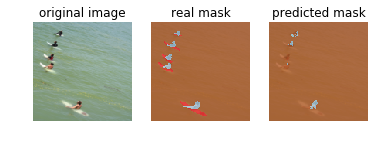

(128, 128)


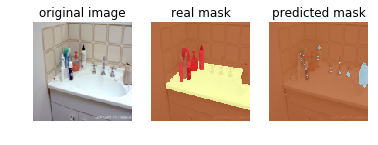

(128, 128)


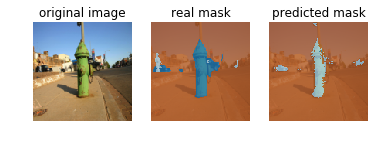

(128, 128)


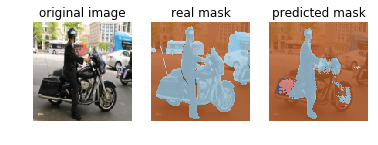

(128, 128)


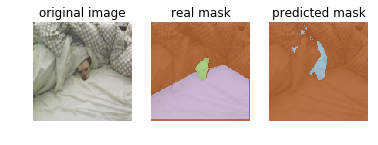

(128, 128)


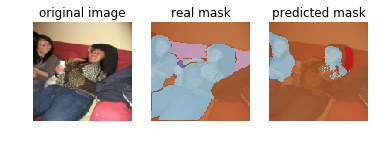

(128, 128)


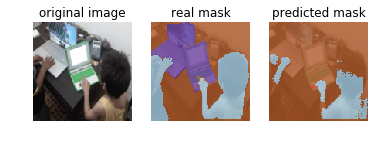

(128, 128)


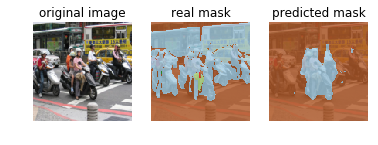

(128, 128)


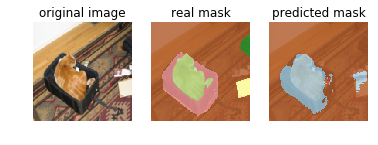

(128, 128)


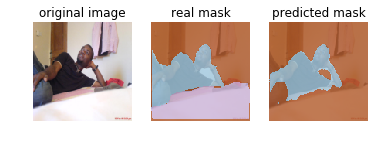

(128, 128)


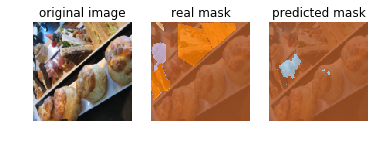

(128, 128)


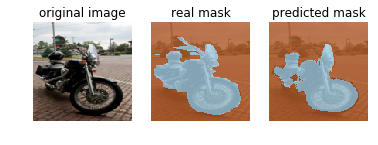

(128, 128)


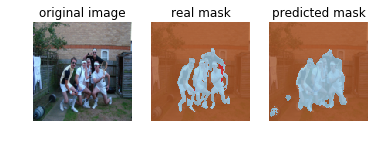

(128, 128)


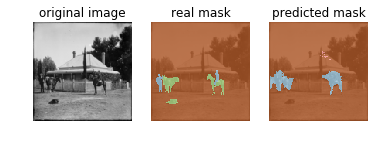

(128, 128)


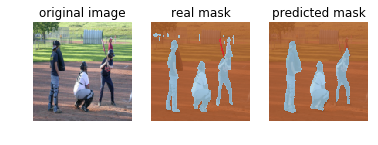

(128, 128)


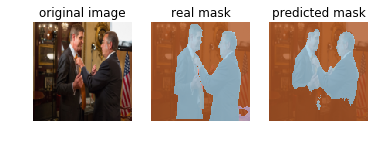

(128, 128)


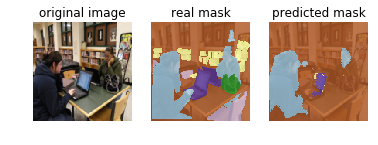

(128, 128)


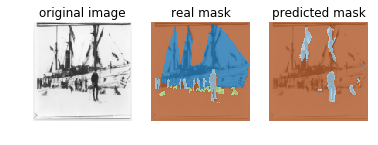

(128, 128)


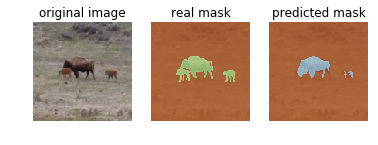

(128, 128)


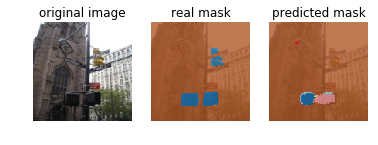

(128, 128)


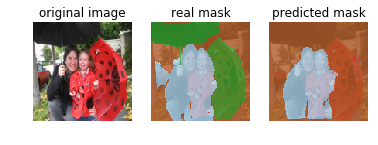

(128, 128)


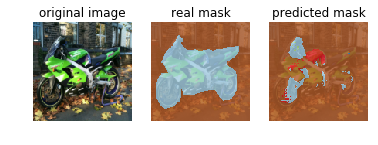

(128, 128)


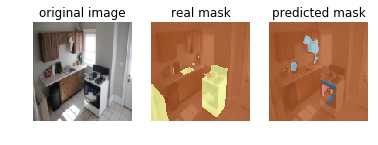

(128, 128)


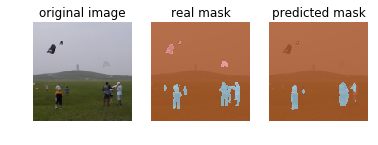

(128, 128)


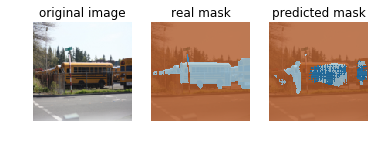

(128, 128)


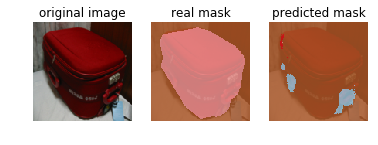

(128, 128)


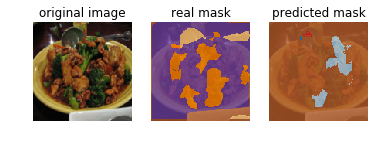

(128, 128)


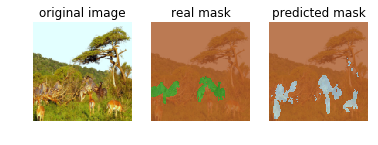

(128, 128)


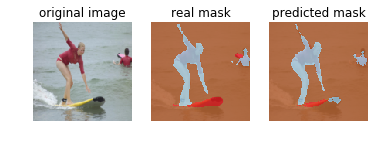

(128, 128)


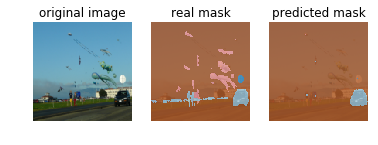

In [14]:
visualize_mask(train_loader, 30)

(128, 128)


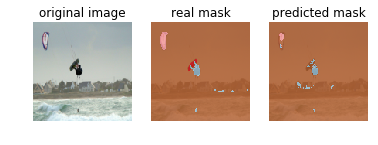

(128, 128)


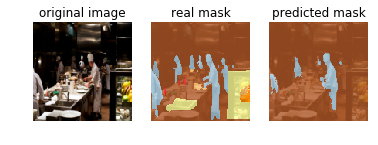

(128, 128)


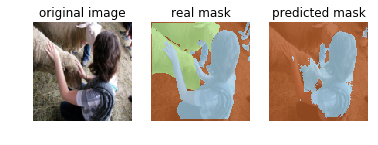

(128, 128)


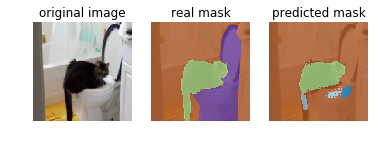

(128, 128)


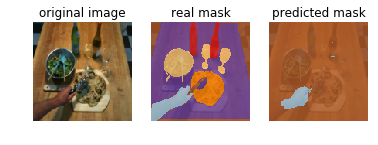

(128, 128)


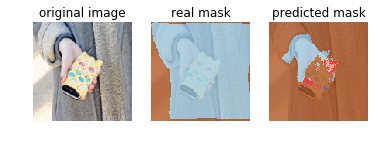

(128, 128)


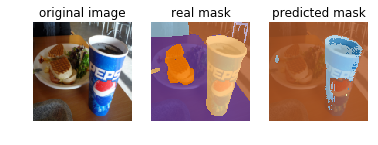

(128, 128)


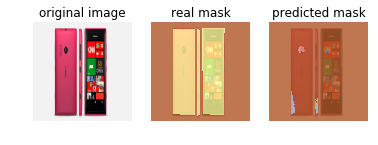

(128, 128)


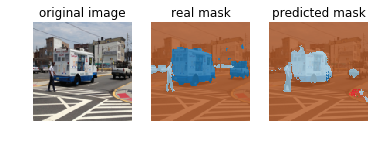

(128, 128)


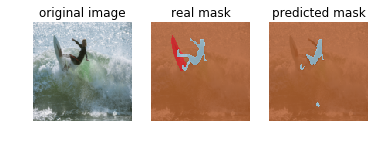

(128, 128)


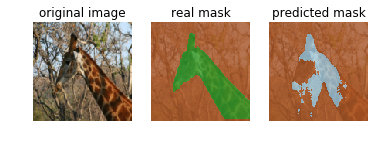

(128, 128)


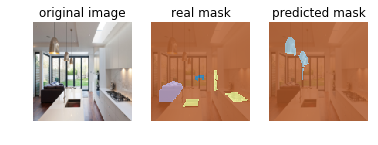

(128, 128)


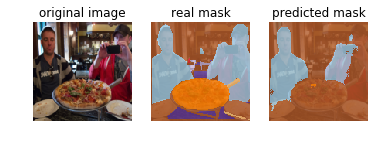

(128, 128)


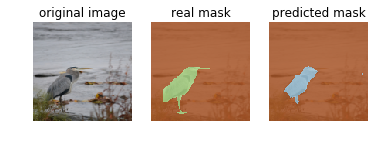

(128, 128)


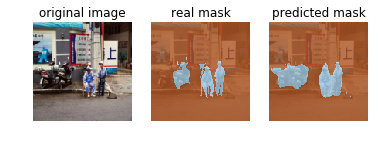

(128, 128)


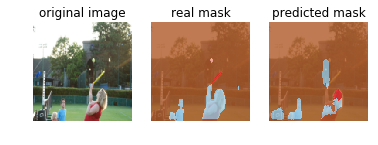

(128, 128)


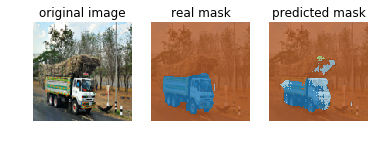

(128, 128)


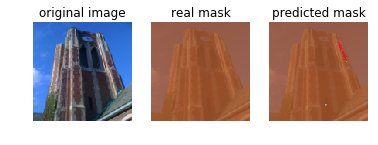

(128, 128)


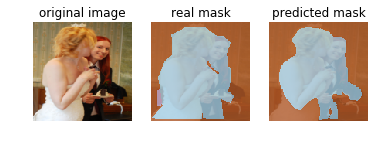

(128, 128)


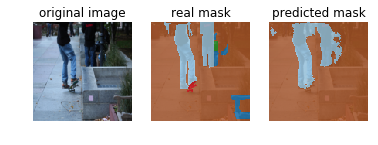

In [13]:
visualize_mask(val_loader, 20)

In [ ]:
val_acc = trainer.evaluate_meanIOU(val_loader, ignore_background=True)
print("Val meanIOU without background: {}".format(val_acc))
train_acc = trainer.evaluate_meanIOU(train_loader, ignore_background=True)
print("Train meanIOU without background: {}".format(train_acc))

val_acc = trainer.evaluate_meanIOU(val_loader, ignore_background=False)
print("Val meanIOU with background: {}".format(val_acc))
train_acc = trainer.evaluate_meanIOU(train_loader, ignore_background=False)
print("Train meanIOU with background: {}".format(train_acc))